In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [19]:
data = pd.read_csv("/home/fvadell/trabajo/Brasil deep dive - BASE.csv")

### Limpieza de datos

In [20]:
data['tipo_cliente'].unique()

array(['small', 'Small', 'Big', nan], dtype=object)

junto small y Small en la misma categoría

In [21]:
data['tipo_cliente'] = ['Small' if x=='small' else x for x in data['tipo_cliente']]
len(data[data['tipo_cliente']=='small'])

0

In [33]:
data.head(20)

,pais,ano_alta,idclientecrm,cliente,nombre,lineaproducto,tipo_cliente,clasificacioncliente,monto_total,clasif_re,CLIENTE GRUPO,Status Cliente,Cambio manual
2,Brasil,2018.0,10400002,2000339152.0,AÇÃO IMOBILIÁRIA IMOBILIÁRIOS,Reso,Small,Upsell/Downsell,8441.40,inmobiliaria,Small,Vigente,NaN
3,Brasil,2018.0,10400005,2000340391.0,ACS EMPREENDIMENTOS IMOBILIÁRI,Aviso Simple,Small,Upsell/Downsell,1304.00,inmobiliaria,Small,Vigente,NaN
4,Brasil,2018.0,10400005,2000340391.0,ACS EMPREENDIMENTOS IMOBILIÁRI,Avisos,Small,Upsell/Downsell,2678.48,inmobiliaria,Small,Vigente,NaN
5,Brasil,2018.0,10400007,2000340644.0,ADAUTO FERREIRA DA SILVA,Aviso Simple,Small,Upsell/Downsell,940.00,inmobiliaria,Small,Vigente,NaN
6,Brasil,2018.0,10400007,2000340644.0,ADAUTO FERREIRA DA SILVA,Avisos,Small,Upsell/Downsell,1930.80,inmobiliaria,Small,Vigente,NaN
7,Brasil,2018.0,10400010,2000257365.0,ADRIANO FREITAS,Aviso Simple,Big,Upsell/Downsell,2200.00,inmobiliaria,Big,Cancelado,NaN
8,Brasil,2018.0,10400010,2000257365.0,ADRIANO FREITAS,Avisos,Big,NaN,0.00,inmobiliaria,Big,Cancelado,NaN
9,Brasil,2018.0,10400010,2000257365.0,ADRIANO FREITAS,Avisos,Big,Upsell/Downsell,8134.00,inmobiliaria,Big,Cancelado,NaN
10,Brasil,2018.0,10400010,2000257365.0,ADRIANO FREITAS,Avisos Destacado,Big,Upsell/Downsell,3196.00,inmobiliaria,Big,Cancelado,NaN
11,Brasil,2018.0,10400013,2000340487.0,AGIL ADMINISTRADORA GERAL DE I,Avisos,Small,Recupero Recurrente,179.00,inmobiliaria,Small,Vigente,NaN


In [32]:
data['clasificacioncliente'].unique()

array(['Upsell/Downsell', nan, 'Recupero Recurrente',
       'Adelanto No Recurrente', 'Nuevo No Recurrente',
       'Renovacion Recurrente', 'free', 'nc', 'Nuevo Recurrente',
       'Desarrollos Nuevo Recurrente', 'Desarrollos Upsell/Downsell',
       'Cross-Sell No Recurrente', 'Recupero No Recurrente',
       'Desarrollos Recupero Recurrente',
       'Desarrollos Renovacion Recurrente', 'Renovacion No Recurrente',
       'Desarrollos Adelanto No Recurrente',
       'Desarrollos Nuevo No Recurrente',
       'Desarrollos Recupero No Recurrente',
       'Desarrollos Renovacion No Recurrente',
       'Desarrollos Cross-Sell No Recurrente'], dtype=object)

In [23]:
data['cliente']=data['cliente'].astype(str)
data['ano_alta']=data['ano_alta'].astype(str)

Saco el '.' que separa los miles en los montos y reemplazamos la ',' por un '.' en el separador decimal

In [24]:
data['monto_total'] = data['monto_total'].str.replace('.', '')
data['monto_total'] = data['monto_total'].str.replace(',', '.')

Las filas sin monto_total tienen '  -   ' en vez de 0, lo cambio por 0

In [25]:
data['monto_total'] = data['monto_total'].str.replace('  -   ', '0')

Hay algunos montos que tienen un espacio entre el signo - y el número, por ejemplo '- 277.0'. Se los saco.

In [26]:
data['monto_total'] = data['monto_total'].str.replace(' ', '')

In [27]:
data['monto_total'] = data['monto_total'].astype(float)

Saco las filas que tienes Status Cliente NaN porque esto es lo que queremos predecir

In [28]:
data = data[data['Status Cliente'].notna()]

In [29]:
data['tipo_cliente'].unique(), data['CLIENTE GRUPO'].unique()

(array(['Small', 'Big'], dtype=object),
 array(['Small', 'Big', 'Desarrollo'], dtype=object))

In [30]:
# Las variables tipo_cliente y CLIENTE GRUPO están muy correlacionadas. Puede que sea necesario sacar una
confusion_matrix(data['tipo_cliente'], data['CLIENTE GRUPO'])

array([[ 2123,   975,     0],
       [    0,     0,     0],
       [    0,   742, 29053]])

Voy a cruzar algunos datos con Bumex: para ello voy a usar como ejemplo a la empresa con id 10400005

In [31]:
data[data['idclientecrm']=='10400005']

,pais,ano_alta,idclientecrm,cliente,nombre,lineaproducto,tipo_cliente,clasificacioncliente,monto_total,clasif_re,CLIENTE GRUPO,Status Cliente,Cambio manual
3,Brasil,2018.0,10400005,2000340391.0,ACS EMPREENDIMENTOS IMOBILIÁRI,Aviso Simple,Small,Upsell/Downsell,1304.00,inmobiliaria,Small,Vigente,NaN
4,Brasil,2018.0,10400005,2000340391.0,ACS EMPREENDIMENTOS IMOBILIÁRI,Avisos,Small,Upsell/Downsell,2678.48,inmobiliaria,Small,Vigente,NaN


__¿Por qué aparece dos veces?__

__¿De dónde salen los montos totales?__ 

Si me fijo en la tabla de pedidos de Bumex encuentro lo siguiente

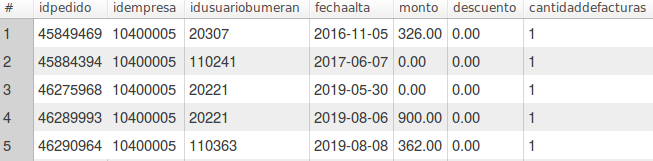

Los montos que figuran en Bumex no tienen fecha de 2018 y tampoco suman lo que aparece en la columna monto_total

### Referencias en Bumex

__idclientecrm__: idempresa en la tabla empresas

__cliente__: idclientesap en la tabla empresas

__nombre__: razon social en la tabla empresas

### Más Preguntas

Preguntarle a Milagros Tomasella <mtomasella@navent.com>

Las siguientes columnas no sé qué son o no quedan claras:
'lineaproducto', 'tipo_cliente', 'clasificacioncliente', 'monto_total',
       'clasif_re', 'CLIENTE GRUPO', 'Cambio manual'

Si busco en la tabla avisos el cliente o idclientecrm no aparecen datos ¿Por qué?

In [16]:
data.head(100)

,pais,ano_alta,idclientecrm,cliente,nombre,lineaproducto,tipo_cliente,clasificacioncliente,monto_total,clasif_re,CLIENTE GRUPO,Status Cliente,Cambio manual
2,Brasil,2018.0,10400002,2000339152.0,AÇÃO IMOBILIÁRIA IMOBILIÁRIOS,Reso,Small,Upsell/Downsell,8441.40,inmobiliaria,Small,Vigente,NaN
3,Brasil,2018.0,10400005,2000340391.0,ACS EMPREENDIMENTOS IMOBILIÁRI,Aviso Simple,Small,Upsell/Downsell,1304.00,inmobiliaria,Small,Vigente,NaN
4,Brasil,2018.0,10400005,2000340391.0,ACS EMPREENDIMENTOS IMOBILIÁRI,Avisos,Small,Upsell/Downsell,2678.48,inmobiliaria,Small,Vigente,NaN
5,Brasil,2018.0,10400007,2000340644.0,ADAUTO FERREIRA DA SILVA,Aviso Simple,Small,Upsell/Downsell,940.00,inmobiliaria,Small,Vigente,NaN
6,Brasil,2018.0,10400007,2000340644.0,ADAUTO FERREIRA DA SILVA,Avisos,Small,Upsell/Downsell,1930.80,inmobiliaria,Small,Vigente,NaN
7,Brasil,2018.0,10400010,2000257365.0,ADRIANO FREITAS,Aviso Simple,Big,Upsell/Downsell,2200.00,inmobiliaria,Big,Cancelado,NaN
8,Brasil,2018.0,10400010,2000257365.0,ADRIANO FREITAS,Avisos,Big,NaN,0.00,inmobiliaria,Big,Cancelado,NaN
9,Brasil,2018.0,10400010,2000257365.0,ADRIANO FREITAS,Avisos,Big,Upsell/Downsell,8134.00,inmobiliaria,Big,Cancelado,NaN
10,Brasil,2018.0,10400010,2000257365.0,ADRIANO FREITAS,Avisos Destacado,Big,Upsell/Downsell,3196.00,inmobiliaria,Big,Cancelado,NaN
11,Brasil,2018.0,10400013,2000340487.0,AGIL ADMINISTRADORA GERAL DE I,Avisos,Small,Recupero Recurrente,179.00,inmobiliaria,Small,Vigente,NaN


Cantidad de empresas

In [16]:
empresas = data['idclientecrm'].unique()
empresas_vigentes = data[data['Status Cliente']=='Vigente']['idclientecrm'].unique()
empresas_canceladas = data[data['Status Cliente']=='Cancelado']['idclientecrm'].unique()

print('Empresas analizadas: '+ str(len(empresas)))
print('Empresas vigentes: ' + str(len(empresas_vigentes)))
print('Empresas canceladas: ' + str(len(empresas_canceladas)))

Empresas analizadas: 14084
Empresas vigentes: 8271
Empresas canceladas: 5813


In [17]:
b = data.groupby(['tipo_cliente', 'Status Cliente']).size().reset_index(name = 'count')
a = (data.groupby('tipo_cliente')['Status Cliente'].value_counts() / data.groupby('tipo_cliente')['Status Cliente'].count()).reset_index(name = 'per')
tipo = pd.merge(a, b, on = ['tipo_cliente', 'Status Cliente'])
tipo['per'] = tipo['per']*100

In [18]:
tipo[tipo['Status Cliente']=='Cancelado'].sort_values('per', ascending = False)

,tipo_cliente,Status Cliente,per,count
3,Small,Cancelado,43.275717,12894
1,Big,Cancelado,21.078115,653


In [19]:
b = data.groupby(['clasificacioncliente', 'Status Cliente']).size().reset_index(name = 'count')
a = (data.groupby('clasificacioncliente')['Status Cliente'].value_counts() / data.groupby('clasificacioncliente')['Status Cliente'].count()).reset_index(name = 'per')
tipo = pd.merge(a, b, on = ['clasificacioncliente', 'Status Cliente'])
tipo['per'] = tipo['per']*100

In [20]:
tipo[tipo['Status Cliente']=='Cancelado'].sort_values('per', ascending = False)

,clasificacioncliente,Status Cliente,per,count
7,Desarrollos Nuevo No Recurrente,Cancelado,72.864322,145
35,free,Cancelado,68.610774,1694
11,Desarrollos Recupero No Recurrente,Cancelado,65.925926,89
15,Desarrollos Renovacion No Recurrente,Cancelado,65.686275,67
5,Desarrollos Cross-Sell No Recurrente,Cancelado,60.000000,6
9,Desarrollos Nuevo Recurrente,Cancelado,59.445844,236
37,nc,Cancelado,53.484603,660
23,Nuevo Recurrente,Cancelado,51.082513,3374
3,Desarrollos Adelanto No Recurrente,Cancelado,50.000000,2
14,Desarrollos Recupero Recurrente,Cancelado,47.154472,58


In [21]:
b = data.groupby(['clasif_re', 'Status Cliente']).size().reset_index(name = 'count')
a = (data.groupby('clasif_re')['Status Cliente'].value_counts() / data.groupby('clasif_re')['Status Cliente'].count()).reset_index(name = 'per')
tipo = pd.merge(a, b, on = ['clasif_re', 'Status Cliente'])
tipo['per'] = tipo['per']*100

In [22]:
tipo[tipo['Status Cliente']=='Cancelado'].sort_values('per', ascending = False)

,clasif_re,Status Cliente,per,count
0,desarrollo,Cancelado,63.568773,855
5,inmobiliaria,Cancelado,39.471801,12136
7,otro,Cancelado,15.000000,3
3,hibrido,Cancelado,7.547170,4


In [23]:
b = data.groupby(['lineaproducto', 'Status Cliente']).size().reset_index(name = 'count')
a = (data.groupby('lineaproducto')['Status Cliente'].value_counts() / data.groupby('lineaproducto')['Status Cliente'].count()).reset_index(name = 'per')
tipo = pd.merge(a, b, on = ['lineaproducto', 'Status Cliente'])
tipo['per'] = tipo['per']*100

In [24]:
tipo[tipo['Status Cliente']=='Cancelado'].sort_values('per', ascending = False)

,lineaproducto,Status Cliente,per,count
10,Desarrollos,Cancelado,60.769231,869
5,Avisos,Cancelado,42.987250,10856
9,BONIFICACIONES A CLIENTES,Cancelado,38.816674,866
21,RECEITA DE MIDIA,Cancelado,30.769231,4
19,RECEITA DE CLASSIFICADOS,Cancelado,28.722778,488
25,Social Boost,Cancelado,26.666667,8
17,Otros (Otras Líneas de Producto),Cancelado,25.735294,70
3,Aviso Simple,Cancelado,22.811448,271
7,Avisos Destacado,Cancelado,20.476190,43
13,Desarrollos a medida,Cancelado,18.750000,18


### Random Forest Classifier

#### Modelo Base

get_dummies transforma variables categóricas en one-hot encodings

In [25]:
dummies = pd.get_dummies(data.filter(['lineaproducto', 'clasificacioncliente', 'clasif_re', 'CLIENTE GRUPO']))

In [26]:
data_dummies = data.join(dummies)

In [27]:
data_dummies['target'] = [(x=='Vigente') for x in data_dummies['Status Cliente']]

In [49]:
data_dummies.head(2)

,pais,ano_alta,idclientecrm,cliente,nombre,lineaproducto,tipo_cliente,clasificacioncliente,monto_total,clasif_re,...,clasificacioncliente_free,clasificacioncliente_nc,clasif_re_desarrollo,clasif_re_hibrido,clasif_re_inmobiliaria,clasif_re_otro,CLIENTE GRUPO_Big,CLIENTE GRUPO_Desarrollo,CLIENTE GRUPO_Small,target
2,Brasil,2018.0,10400002,2000339152.0,AÇÃO IMOBILIÁRIA IMOBILIÁRIOS,Reso,Small,Upsell/Downsell,8441.4,inmobiliaria,...,0,0,0,0,1,0,0,0,1,True
3,Brasil,2018.0,10400005,2000340391.0,ACS EMPREENDIMENTOS IMOBILIÁRI,Aviso Simple,Small,Upsell/Downsell,1304.0,inmobiliaria,...,0,0,0,0,1,0,0,0,1,True


In [29]:
#data_dummies.columns

In [30]:
X = data_dummies.iloc[:, 13:-1].values
y = data_dummies.iloc[:, -1].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [32]:
sample_weight = np.array([1.1 if i == 0 else 1 for i in y_train])

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=1000)
regressor.fit(X_train, y_train, sample_weight = sample_weight)
y_pred = regressor.predict(X_test)

In [34]:
regressor.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
#data_dummies.iloc[:, 13:].head(50)

In [36]:
regressor.feature_importances_

array([1.39044474e-02, 1.97593683e-02, 5.91120888e-02, 5.28535147e-03,
       2.09339426e-02, 1.77282419e-02, 2.99682844e-03, 1.16802311e-03,
       4.15401321e-03, 5.74345378e-02, 1.59119880e-03, 5.55463279e-03,
       1.78886578e-03, 4.39017236e-05, 4.99323638e-04, 4.64961273e-04,
       3.18240505e-04, 4.83385891e-03, 4.52873678e-03, 1.96090814e-03,
       2.92740747e-03, 9.42869885e-04, 7.97897713e-03, 5.25265028e-03,
       6.26010970e-03, 7.29092287e-02, 1.95108865e-03, 2.36261956e-02,
       1.58999165e-03, 4.17464189e-02, 5.35139364e-02, 1.77529401e-01,
       3.43575125e-02, 2.57077138e-02, 1.30870747e-02, 1.09397464e-01,
       1.88988646e-03, 1.07513564e-01, 1.33963225e-02, 7.43607157e-02])

In [37]:
# Corro para todo el dataset

In [38]:
y_hat = regressor.predict(X)

La predicción será un número de 0 a 1 porque 

In [39]:
y_hat2 = ['Vigente' if x==True else 'Cancelado' for x in y_hat]

In [40]:
data['pred'] = y_hat2

In [41]:
data['Correct'] = np.where(data['Status Cliente'] == data['pred'], True, False)

In [42]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(data['Status Cliente'], data['pred'])

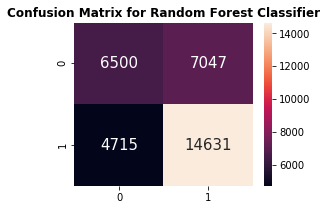

In [43]:
plt.figure(figsize = (4,3))
ax = sns.heatmap(confusion, annot=True, annot_kws={"size": 15},fmt="d")
plt.title('Confusion Matrix for Random Forest Classifier', fontweight="bold");

In [44]:
c_v = len(data[(data['pred']=='Cancelado')&(data['Status Cliente']=='Vigente')])

In [45]:
c_c = len(data[(data['pred']=='Cancelado')&(data['Status Cliente']=='Cancelado')])

In [46]:
v_v = len(data[(data['pred']=='Vigente')&(data['Status Cliente']=='Vigente')])

In [47]:
v_c = len(data[(data['pred']=='Vigente')&(data['Status Cliente']=='Cancelado')])

In [17]:
len_data = len(data)
len_cancelados = len(data[data['Status Cliente']=='Cancelado'])
len_pred_cancelados = len(data[data['pred']=='Cancelado'])

print('Train size: ', len(X_train))
print('Test size: ', len(y_test))
print('Test size %: ',len(y_test)*100/len_data)
print('Cancelados predichos: ', len_pred_cancelados)
print('Cancelados %: ', len_cancelados*100/len_data)
print('Predicted Cancelados %: ', len_pred_cancelados*100/len_data)
print('Accuracy | Cancelado %: ', c_c*100/len(data[data['Status Cliente']=='Cancelado']))
print('Accuracy | Vigente %: ', v_v*100/len(data[data['Status Cliente']=='Vigente']))
print('Accuracy: ',len(data[data['Correct']==True])*100/len(data))

KeyError: 'pred'